<a href="https://colab.research.google.com/github/vicfera001/programacao-linear/blob/main/CERVEJA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MISTURA DE CERVEJA** (exercício 3)

A EMPRESA BIERCO PRODUZ DOIS TIPOS DE CERVEJA (B1 E B2) A PARTIR DE TRÊS INGREDIENTES (MILHO, LÚPULO E MALTE). CADA BARRIL DE CERVEJA B1 USA UM SACO DE MILHO, UM DE LÚPULO E DOIS DE MALTE, ENQUANTO QUE CADA BARRIL DE B2 DEVE TER DOIS SACOS DE MILHO, UM DE LÚPULO E UM DE MALTE. CADA SACO TEM 10 KG. ESTÃO DISPONÍVEIS PARA A PRODUÇÃO MENSAL, EM ESTOQUE, 80 SACOS DE MILHO, 30 DE LÚPULO E 40 DE MALTE.

O PREÇO DE VENDA DO BARRIL B1 É CINQUENTA REAIS.


O PREÇO DE VENDA DO BARRIL B2 É QUARENTA REAIS.

# PERGUNTAS
1- QUANTOS BARRIS DE CADA CERVEJA A EMPRESA DEVE PRODUZIR NO PRÓXIMO MÊS PARA OBTER O MÁXIMO VALOR COM A VENDA, CONSIDERANDO QUE TODA A CERVEJA PRODUZIDA SERÁ VENDIDA?

2- QUANTOS SACOS DE CADA INGREDIENTE SERÃO UTILIZADOS?

3- QUANTOS SACOS PERMANECERÃO EM ESTOQUE FINAL DO MÊS?


In [ ]:
!pip install -q pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.3 MB/s eta 0:00:00


In [ ]:
from pulp import *

# Definir o problema de maximização
prob = LpProblem("MaxLucro_Cerveja", LpMaximize)

# Variáveis
x1 = LpVariable("B1", lowBound=0, cat="Continuous")
x2 = LpVariable("B2", lowBound=0, cat="Continuous")

# Função objetivo
prob += 50 * x1 + 40 * x2, "Receita_Total"

# Restrições
prob += x1 + 2 * x2 <= 80, "Milho"
prob += x1 + x2 <= 30, "Lupulo"
prob += 2 * x1 + x2 <= 40, "Malte"

# Resolver
prob.solve()

# Resultados
print("Status:", LpStatus[prob.status])
print("Barrís de B1:", value(x1))
print("Barrís de B2:", value(x2))
print("Receita total: R$", value(prob.objective))

# Sacos usados
milho_usado = value(x1) + 2 * value(x2)
lupulo_usado = value(x1) + value(x2)
malte_usado = 2 * value(x1) + value(x2)

print("\nSacos utilizados:")
print("Milho:", milho_usado)
print("Lúpulo:", lupulo_usado)
print("Malte:", malte_usado)

print("\nSacos restantes:")
print("Milho:", 80 - milho_usado)
print("Lúpulo:", 30 - lupulo_usado)
print("Malte:", 40 - malte_usado)


Status: Optimal
Barrís de B1: 10.0
Barrís de B2: 20.0
Receita total: R$ 1300.0

Sacos utilizados:
Milho: 50.0
Lúpulo: 30.0
Malte: 40.0

Sacos restantes:
Milho: 30.0
Lúpulo: 0.0
Malte: 0.0


# **ANÁLISE DE SENSIBILIDADE**

🔎 Sensibilidade – Preço da B2 (B1 fixo em R$50):


,B1,B2,Lucro,Preço_B2
0,20.0,0.0,1000.0,20
1,20.0,0.0,1000.0,22
2,20.0,0.0,1000.0,24
3,10.0,20.0,1020.0,26
4,10.0,20.0,1060.0,28
5,10.0,20.0,1100.0,30
6,10.0,20.0,1140.0,32
7,10.0,20.0,1180.0,34
8,10.0,20.0,1220.0,36
9,10.0,20.0,1260.0,38


🔎 Sensibilidade – Preço da B1 (B2 fixo em R$40):


,B1,B2,Lucro,Preço_B1
0,0.0,30.0,1200.0,20
1,0.0,30.0,1200.0,22
2,0.0,30.0,1200.0,24
3,0.0,30.0,1200.0,26
4,0.0,30.0,1200.0,28
5,0.0,30.0,1200.0,30
6,0.0,30.0,1200.0,32
7,0.0,30.0,1200.0,34
8,0.0,30.0,1200.0,36
9,0.0,30.0,1200.0,38


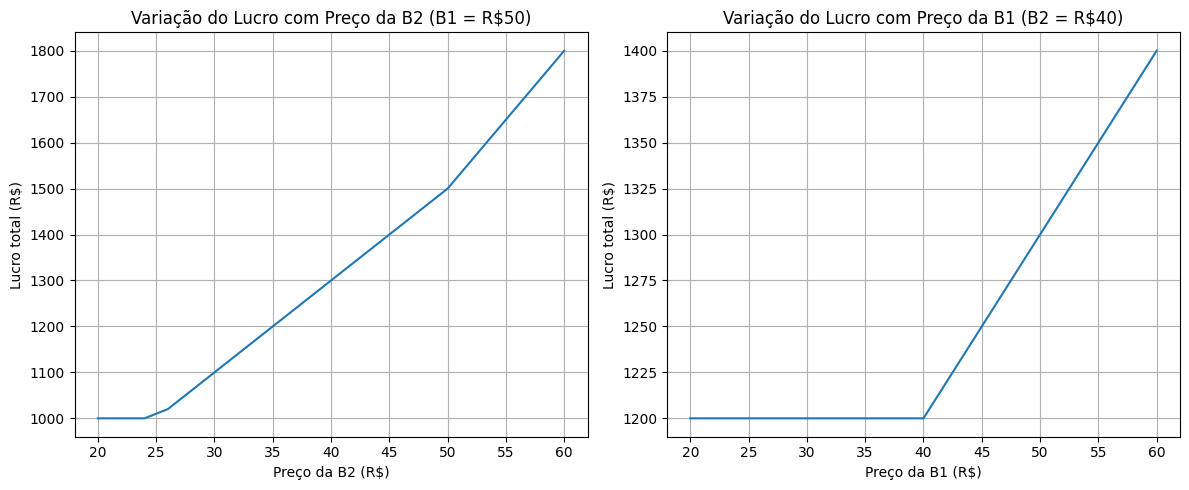

In [ ]:
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt

# Função que resolve o modelo com preços variáveis
def resolve_modelo(preco_b1, preco_b2):
    prob = LpProblem("MaxLucro_Cerveja", LpMaximize)
    x1 = LpVariable("B1", lowBound=0)
    x2 = LpVariable("B2", lowBound=0)

    prob += preco_b1 * x1 + preco_b2 * x2
    prob += x1 + 2 * x2 <= 80     # Milho
    prob += x1 + x2 <= 30         # Lúpulo
    prob += 2 * x1 + x2 <= 40     # Malte

    prob.solve()
    return (value(x1), value(x2), value(prob.objective))

# Análise: manter preço B1 fixo em 50, variar B2
b2_values = list(range(20, 61, 2))
dados_b2 = [resolve_modelo(50, b2) for b2 in b2_values]

# Análise: manter preço B2 fixo em 40, variar B1
b1_values = list(range(20, 61, 2))
dados_b1 = [resolve_modelo(b1, 40) for b1 in b1_values]

# Criar DataFrames
df_b2 = pd.DataFrame(dados_b2, columns=["B1", "B2", "Lucro"])
df_b2["Preço_B2"] = b2_values

df_b1 = pd.DataFrame(dados_b1, columns=["B1", "B2", "Lucro"])
df_b1["Preço_B1"] = b1_values

# Exibir resultados
print("🔎 Sensibilidade – Preço da B2 (B1 fixo em R$50):")
display(df_b2)

print("🔎 Sensibilidade – Preço da B1 (B2 fixo em R$40):")
display(df_b1)

# Gráficos
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(df_b2["Preço_B2"], df_b2["Lucro"])
plt.title("Variação do Lucro com Preço da B2 (B1 = R$50)")
plt.xlabel("Preço da B2 (R$)")
plt.ylabel("Lucro total (R$)")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(df_b1["Preço_B1"], df_b1["Lucro"])
plt.title("Variação do Lucro com Preço da B1 (B2 = R$40)")
plt.xlabel("Preço da B1 (R$)")
plt.ylabel("Lucro total (R$)")
plt.grid(True)

plt.tight_layout()
plt.show()


🔎 Sensibilidade – Preço da B2 (B1 fixo em R$50):


,B1,B2,Lucro,Preço_B2
0,20.0,0.0,1000.0,20
1,20.0,0.0,1000.0,22
2,20.0,0.0,1000.0,24
3,10.0,20.0,1020.0,26
4,10.0,20.0,1060.0,28
5,10.0,20.0,1100.0,30
6,10.0,20.0,1140.0,32
7,10.0,20.0,1180.0,34
8,10.0,20.0,1220.0,36
9,10.0,20.0,1260.0,38


🔎 Sensibilidade – Preço da B1 (B2 fixo em R$40):


,B1,B2,Lucro,Preço_B1
0,0.0,30.0,1200.0,20
1,0.0,30.0,1200.0,22
2,0.0,30.0,1200.0,24
3,0.0,30.0,1200.0,26
4,0.0,30.0,1200.0,28
5,0.0,30.0,1200.0,30
6,0.0,30.0,1200.0,32
7,0.0,30.0,1200.0,34
8,0.0,30.0,1200.0,36
9,0.0,30.0,1200.0,38


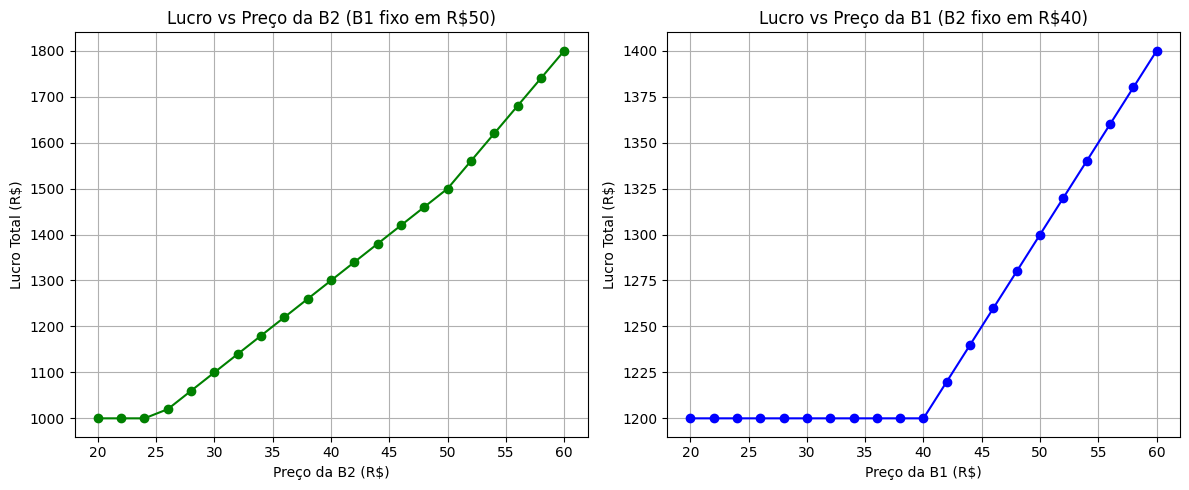

from matplotlib import pyplot as plt
df_b2['B1'].plot(kind='hist', bins=20, title='B1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2['B2'].plot(kind='hist', bins=20, title='B2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2['Lucro'].plot(kind='hist', bins=20, title='Lucro')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2['Preço_B2'].plot(kind='hist', bins=20, title='Preço_B2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2.plot(kind='scatter', x='B1', y='B2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2.plot(kind='scatter', x='B2', y='Lucro', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_b2.plot(kind='scatter', x='Lucro', y='Preço_B2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['B2']
  ys = series['B1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_b2.sort_values('B2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('B2')
_ = plt.ylabel('B1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['B2']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'B2'}, axis=1)
              .sort_values('B2', ascending=True))
  xs = counted['B2']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_b2.sort_values('B2', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('B2')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Lucro']
  ys = series['B1']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_b2.sort_values('Lucro', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Lucro')
_ = plt.ylabel('B1')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Lucro']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Lucro'}, axis=1)
              .sort_values('Lucro', ascending=True))
  xs = counted['Lucro']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_b2.sort_values('Lucro', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Lucro')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_b2['B1'].plot(kind='line', figsize=(8, 4), title='B1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_b2['B2'].plot(kind='line', figsize=(8, 4), title='B2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_b2['Lucro'].plot(kind='line', figsize=(8, 4), title='Lucro')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_b2['Preço_B2'].plot(kind='line', figsize=(8, 4), title='Preço_B2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from pulp import *
import pandas as pd
import matplotlib.pyplot as plt

# Função que resolve o modelo com preços variáveis
def resolve_modelo(preco_b1, preco_b2):
    prob = LpProblem("MaxLucro_Cerveja", LpMaximize)
    x1 = LpVariable("B1", lowBound=0)
    x2 = LpVariable("B2", lowBound=0)

    prob += preco_b1 * x1 + preco_b2 * x2
    prob += x1 + 2 * x2 <= 80     # Milho
    prob += x1 + x2 <= 30         # Lúpulo
    prob += 2 * x1 + x2 <= 40     # Malte

    prob.solve()
    return (value(x1), value(x2), value(prob.objective))

# Variação do preço de B2 com B1 fixo
b2_values = list(range(20, 61, 2))
dados_b2 = [resolve_modelo(50, b2) for b2 in b2_values]
df_b2 = pd.DataFrame(dados_b2, columns=["B1", "B2", "Lucro"])
df_b2["Preço_B2"] = b2_values

# Variação do preço de B1 com B2 fixo
b1_values = list(range(20, 61, 2))
dados_b1 = [resolve_modelo(b1, 40) for b1 in b1_values]
df_b1 = pd.DataFrame(dados_b1, columns=["B1", "B2", "Lucro"])
df_b1["Preço_B1"] = b1_values

# Exibir tabelas
print("🔎 Sensibilidade – Preço da B2 (B1 fixo em R$50):")
display(df_b2)

print("🔎 Sensibilidade – Preço da B1 (B2 fixo em R$40):")
display(df_b1)

# Gráficos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_b2["Preço_B2"], df_b2["Lucro"], marker='o', color='green')
plt.title("Lucro vs Preço da B2 (B1 fixo em R$50)")
plt.xlabel("Preço da B2 (R$)")
plt.ylabel("Lucro Total (R$)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(df_b1["Preço_B1"], df_b1["Lucro"], marker='o', color='blue')
plt.title("Lucro vs Preço da B1 (B2 fixo em R$40)")
plt.xlabel("Preço da B1 (R$)")
plt.ylabel("Lucro Total (R$)")
plt.grid(True)

plt.tight_layout()
plt.show()


# Gráfico de superfície (surface plot) ou mapa de calor (heatmap)
 Eles mostram como a função objetivo (lucro) se comporta à medida que os dois preços variam ao mesmo tempo.

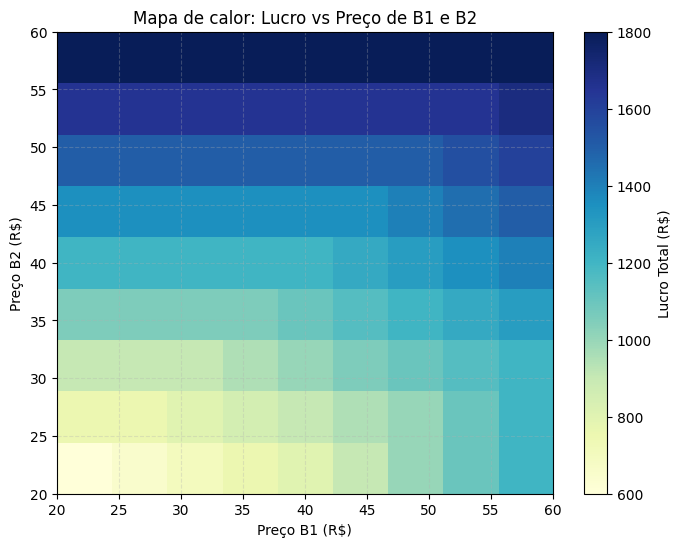

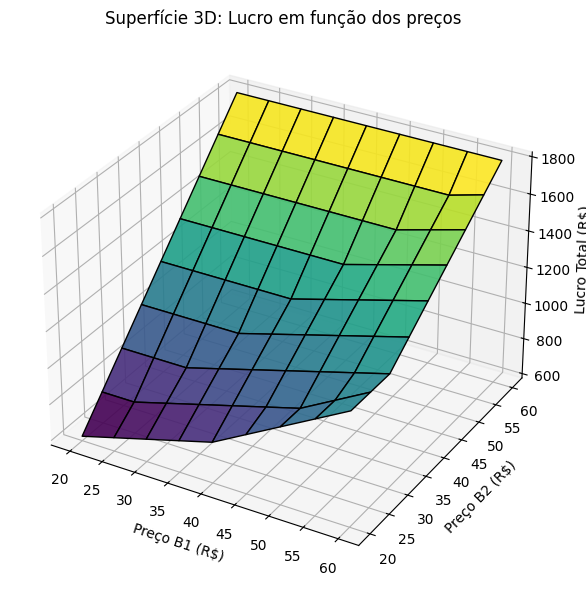

In [5]:
from pulp import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Função para resolver o modelo com preços variados
def resolve_modelo(preco_b1, preco_b2):
    prob = LpProblem("MaxLucro_Cerveja", LpMaximize)
    x1 = LpVariable("B1", lowBound=0)
    x2 = LpVariable("B2", lowBound=0)
    prob += preco_b1 * x1 + preco_b2 * x2
    prob += x1 + 2 * x2 <= 80
    prob += x1 + x2 <= 30
    prob += 2 * x1 + x2 <= 40
    prob.solve()
    return value(prob.objective)

# Faixas de preços
precos_b1 = list(range(20, 61, 5))
precos_b2 = list(range(20, 61, 5))

# Matriz de lucro
lucro_matrix = []

for pb2 in precos_b2:
    linha = []
    for pb1 in precos_b1:
        lucro = resolve_modelo(pb1, pb2)
        linha.append(lucro)
    lucro_matrix.append(linha)

lucro_matrix = np.array(lucro_matrix)

# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(lucro_matrix, extent=[20, 60, 20, 60], origin='lower', cmap='YlGnBu', aspect='auto')
plt.colorbar(label='Lucro Total (R$)')
plt.title("Mapa de calor: Lucro vs Preço de B1 e B2")
plt.xlabel("Preço B1 (R$)")
plt.ylabel("Preço B2 (R$)")
plt.xticks(precos_b1)
plt.yticks(precos_b2)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

# Gráfico 3D
X, Y = np.meshgrid(precos_b1, precos_b2)
Z = lucro_matrix

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k', alpha=0.9)
ax.set_xlabel('Preço B1 (R$)')
ax.set_ylabel('Preço B2 (R$)')
ax.set_zlabel('Lucro Total (R$)')
ax.set_title("Superfície 3D: Lucro em função dos preços")
plt.tight_layout()
plt.show()


Solução ótima:
B1 = 10.00 barris
B2 = 20.00 barris
Lucro máximo: R$ 1300.00


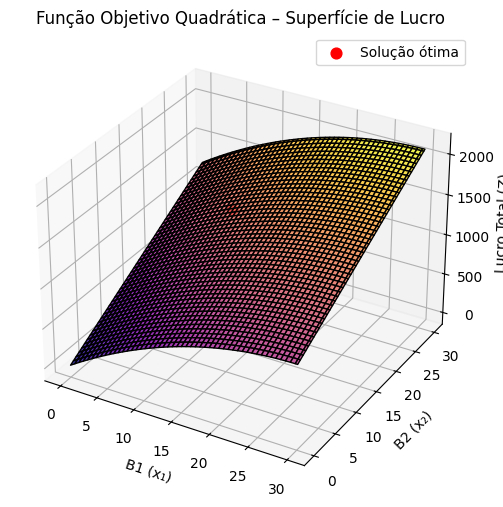

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Função objetivo (negativa porque SciPy faz minimização)
def objetivo(x):
    x1, x2 = x
    return -( -x1**2 + 60*x1 + 40*x2 )

# Restrições (formato: <= 0)
restricoes = [
    {'type': 'ineq', 'fun': lambda x: 80 - (x[0] + 2*x[1])},  # Milho
    {'type': 'ineq', 'fun': lambda x: 30 - (x[0] + x[1])},    # Lúpulo
    {'type': 'ineq', 'fun': lambda x: 40 - (2*x[0] + x[1])},  # Malte
    {'type': 'ineq', 'fun': lambda x: x[0]},                 # x1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]}                  # x2 >= 0
]

# Estimar solução
x0 = [0, 0]
res = minimize(objetivo, x0, constraints=restricoes)

# Resultados
x1_opt, x2_opt = res.x
lucro_max = -res.fun
print(f"Solução ótima:\nB1 = {x1_opt:.2f} barris\nB2 = {x2_opt:.2f} barris\nLucro máximo: R$ {lucro_max:.2f}")

# Gerar gráfico 3D da função objetivo
x1_vals = np.linspace(0, 30, 100)
x2_vals = np.linspace(0, 30, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = -X1**2 + 60*X1 + 40*X2

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='plasma', edgecolor='k', alpha=0.8)
ax.set_xlabel("B1 (x₁)")
ax.set_ylabel("B2 (x₂)")
ax.set_zlabel("Lucro Total (Z)")
ax.set_title("Função Objetivo Quadrática – Superfície de Lucro")

# Marcar ponto ótimo
ax.scatter(x1_opt, x2_opt, lucro_max, color='red', s=60, label="Solução ótima")
ax.legend()
plt.show()


Solução ótima com utilidade marginal logarítmica:
B1 = 10.94 barris
B2 = 18.11 barris
Impacto máximo (lucro marginal total): R$ 242.02


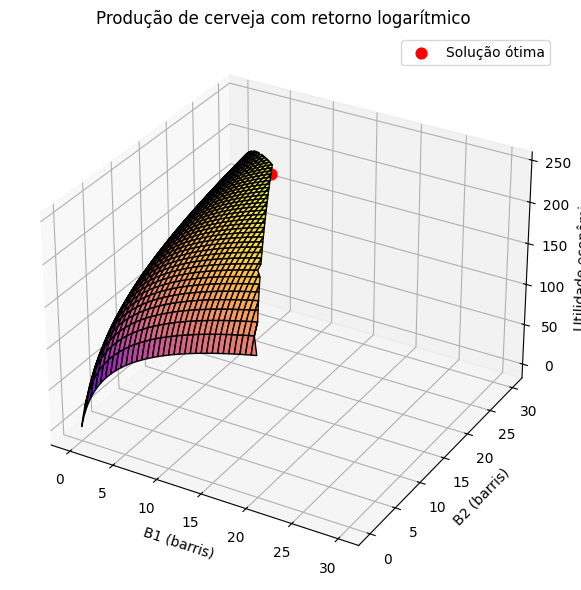

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Função objetivo com retorno logarítmico (decrescente)
def objetivo(x):
    x1, x2 = x
    return -(50 * np.log(x1 + 1) + 40 * np.log(x2 + 1))

# Restrições do modelo
restricoes = [
    {'type': 'ineq', 'fun': lambda x: 80 - (x[0] + 2*x[1])},  # Milho
    {'type': 'ineq', 'fun': lambda x: 30 - (x[0] + x[1])},    # Lúpulo
    {'type': 'ineq', 'fun': lambda x: 40 - (2*x[0] + x[1])},  # Malte
    {'type': 'ineq', 'fun': lambda x: x[0]},  # x1 >= 0
    {'type': 'ineq', 'fun': lambda x: x[1]}   # x2 >= 0
]

# Estimar solução
x0 = [1, 1]
res = minimize(objetivo, x0, constraints=restricoes)
x1_opt, x2_opt = res.x
z_max = -res.fun

print(f"Solução ótima com utilidade marginal logarítmica:")
print(f"B1 = {x1_opt:.2f} barris")
print(f"B2 = {x2_opt:.2f} barris")
print(f"Impacto máximo (lucro marginal total): R$ {z_max:.2f}")

# Superfície 3D da função objetivo
x1_vals = np.linspace(0, 30, 100)
x2_vals = np.linspace(0, 30, 100)
X1, X2 = np.meshgrid(x1_vals, x2_vals)
Z = 50 * np.log(X1 + 1) + 40 * np.log(X2 + 1)

# Zonas inviáveis (fora das restrições)
Z[(X1 + 2*X2 > 80) | (X1 + X2 > 30) | (2*X1 + X2 > 40)] = np.nan

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='plasma', edgecolor='k', alpha=0.85)
ax.set_xlabel("B1 (barris)")
ax.set_ylabel("B2 (barris)")
ax.set_zlabel("Utilidade econômica")
ax.set_title("Produção de cerveja com retorno logarítmico")
ax.scatter(x1_opt, x2_opt, z_max, color='red', s=60, label="Solução ótima")
ax.legend()
plt.tight_layout()
plt.show()


In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize, linprog

# --- MODELO LOGARÍTMICO ---
def objetivo_log(x):
    x1, x2 = x
    return -(50 * np.log(x1 + 1) + 40 * np.log(x2 + 1))

restricoes = [
    {'type': 'ineq', 'fun': lambda x: 80 - (x[0] + 2*x[1])},
    {'type': 'ineq', 'fun': lambda x: 30 - (x[0] + x[1])},
    {'type': 'ineq', 'fun': lambda x: 40 - (2*x[0] + x[1])},
    {'type': 'ineq', 'fun': lambda x: x[0]},
    {'type': 'ineq', 'fun': lambda x: x[1]}
]

res_log = minimize(objetivo_log, [1, 1], constraints=restricoes)
x1_log, x2_log = res_log.x
z_log = -res_log.fun

# --- MODELO LINEAR ---
c_linear = [-50, -40]
A = [[1, 2], [1, 1], [2, 1]]
b = [80, 30, 40]

res_linear = linprog(c=c_linear, A_ub=A, b_ub=b, bounds=(0, None), method='highs')
x1_lin, x2_lin = res_linear.x
z_lin = -res_linear.fun

# --- COMPARAÇÃO ---
comparacao = pd.DataFrame({
    "Modelo": ["Linear", "Logarítmico (utilidade marginal)"],
    "B1 (barris)": [x1_lin, x1_log],
    "B2 (barris)": [x2_lin, x2_log],
    "Lucro / Impacto Econômico": [z_lin, z_log]
})

display(comparacao)


,Modelo,B1 (barris),B2 (barris),Lucro / Impacto Econômico
0,Linear,10.000000,20.000000,1300.000000
1,Logarítmico (utilidade marginal),10.944479,18.111042,242.024109
